# Website Classifier
Classify websites with Naive Bayes, designed for my Screen Time extension  
Find the [dataset](https://www.kaggle.com/datasets/hetulmehta/website-classification) here

## 1. Import Libraries

In [105]:
import numpy as np
import pandas as pd

## 2. Load Dataset

In [106]:
ds = pd.read_csv("website_classification.csv")

In [107]:
ds.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


### 2.1 Check for Missing Data

In [108]:
features = ["cleaned_website_text"]
output = "Category"

In [109]:
for col in features:
    if True in ds[col].isna().values:
        print(f"{col} is missing data")

In [110]:
X = ds[features].values
y = ds[output].values

### 2.2 Vectorize Text

In [111]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

corpus = []
ss = SnowballStemmer(language="english")
english_words = set(stopwords.words())
for description in X:
    tokens = description[0].split()
    corpus.append(" ".join([ss.stem(word) for word in tokens if not word in english_words]))

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words="english", max_features=1500)
X = cv.fit_transform(corpus).toarray()

### 2.3 Encode Categorical Data

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

### 2.4 Split Dataset

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## 3. Create Model

In [115]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

### 3.1 Make Predictions

In [116]:
def predict(description):
    import re 
    description = re.sub(r"[^a-zA-Z]", " ", description).lower()
    description = cv.transform([description]).toarray()
    return le.inverse_transform(classifier.predict(description))

In [122]:
predict("computers")

array(['Business/Corporate'], dtype=object)

### 3.2 Evaluate Model

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
print("train accuracy = ", round(accuracy_score(y_train, y_train_pred), 2))
print("test accuracy = ", round(accuracy_score(y_test, y_test_pred), 2))

train accuracy =  0.94
test accuracy =  0.87


<AxesSubplot: >

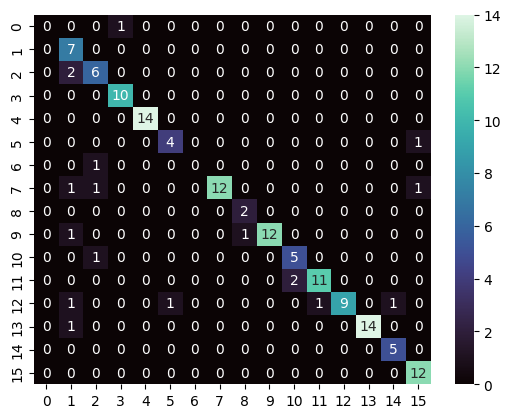

In [126]:
import seaborn as sb

sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="mako")

### 3.3 Save Model

In [127]:
import pickle

def save(file_path, object):
    with open(file_path, "wb") as file:
        pickle.dump(object, file)

In [129]:
save("model/cv.pkl", cv) # vectorizer
save("model/le.pkl", le) # label encoder
save("model/classifier.pkl", classifier) # classifier